In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Preprocess the data
# Expand dimensions to add a channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Duplicate the single channel to create RGB images
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Resize images to fit InceptionV3 input size
x_train_resized = tf.image.resize(x_train, [128, 128]).numpy()
x_test_resized = tf.image.resize(x_test, [128, 128]).numpy()

2023-12-20 23:07:19.174064: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-20 23:07:19.174197: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-20 23:07:19.174304: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-20 23:07:19.174390: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-20 23:07:19.174456: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-20 23:07:19.174710: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-20 23:07:19.174810: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

In [5]:
input_layer = layers.Input(shape=(128, 128, 3))

In [6]:
print(f'shape of x_train={x_train.shape} , x_test={x_test.shape} , y_train={y_train.shape} and y_test={y_test.shape}')


shape of x_train=(60000, 28, 28, 3) , x_test=(10000, 28, 28, 3) , y_train=(60000, 10) and y_test=(10000, 10)


In [7]:
print(f'shape of x_train_mnist={x_train_resized.shape} , x_test_mnist={x_test_resized.shape}')

shape of x_train_mnist=(60000, 128, 128, 3) , x_test_mnist=(10000, 128, 128, 3)


In [8]:
model_InceptionV3 = InceptionV3(weights='imagenet', input_tensor=input_layer, include_top=False)


87910968/87910968 [==============================] - 0s 0us/step


In [9]:
model_InceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 63, 63, 32)           0         ['batch_normalizati

In [10]:
x = layers.GlobalAveragePooling2D()(model_InceptionV3.output)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output_layer=layers.Dense(10,activation='softmax')(x)

In [11]:
model = models.Model(inputs=input_layer, outputs=output_layer)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 63, 63, 32)           0         ['batch_normalization[0][0

In [14]:
model.fit(x_train_resized, y_train, epochs=5, batch_size=64, validation_data=(x_test_resized, y_test))


Epoch 1/5
938/938 [==============================] - 678s 705ms/step - loss: 0.1565 - accuracy: 0.9635 - val_loss: 0.1257 - val_accuracy: 0.9756
Epoch 2/5
938/938 [==============================] - 655s 699ms/step - loss: 0.0900 - accuracy: 0.9804 - val_loss: 0.0569 - val_accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 651s 694ms/step - loss: 0.0599 - accuracy: 0.9864 - val_loss: 0.0327 - val_accuracy: 0.9928
Epoch 4/5
938/938 [==============================] - 647s 689ms/step - loss: 0.0450 - accuracy: 0.9894 - val_loss: 0.0380 - val_accuracy: 0.9902
Epoch 5/5
938/938 [==============================] - 646s 689ms/step - loss: 0.0375 - accuracy: 0.9911 - val_loss: 0.0744 - val_accuracy: 0.9822


In [15]:
for layer in model.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Trainable Parameters: {layer.count_params()}\n")

Layer Name: input_1
Trainable Parameters: 0

Layer Name: conv2d
Trainable Parameters: 864

Layer Name: batch_normalization
Trainable Parameters: 96

Layer Name: activation
Trainable Parameters: 0

Layer Name: conv2d_1
Trainable Parameters: 9216

Layer Name: batch_normalization_1
Trainable Parameters: 96

Layer Name: activation_1
Trainable Parameters: 0

Layer Name: conv2d_2
Trainable Parameters: 18432

Layer Name: batch_normalization_2
Trainable Parameters: 192

Layer Name: activation_2
Trainable Parameters: 0

Layer Name: max_pooling2d
Trainable Parameters: 0

Layer Name: conv2d_3
Trainable Parameters: 5120

Layer Name: batch_normalization_3
Trainable Parameters: 240

Layer Name: activation_3
Trainable Parameters: 0

Layer Name: conv2d_4
Trainable Parameters: 138240

Layer Name: batch_normalization_4
Trainable Parameters: 576

Layer Name: activation_4
Trainable Parameters: 0

Layer Name: max_pooling2d_1
Trainable Parameters: 0

Layer Name: conv2d_8
Trainable Parameters: 12288

Layer N

In [16]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


313/313 [==============================] - 25s 77ms/step


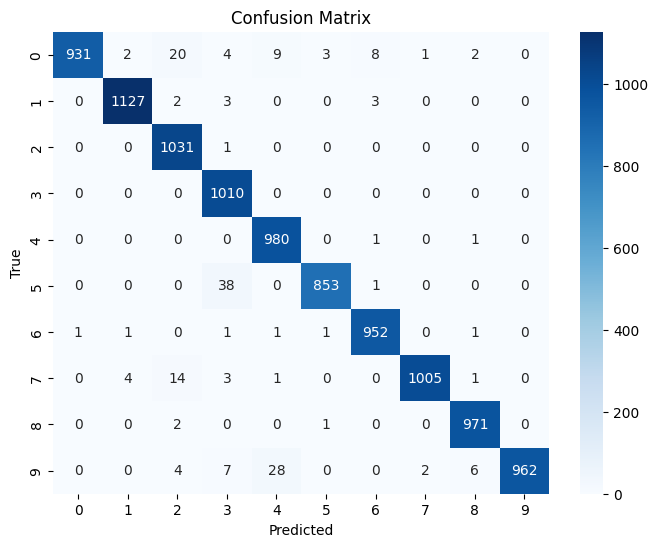

In [17]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test_resized)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
     

Precision: 0.9827934505937108
Recall: 0.9822
F1 Score: 0.9821896748379817
